#Reading Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost
import pickle

ds_ccfraud = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Creditcard_repo/master/creditcard.csv', header=None)

In [2]:
ds_ccfraud.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Time series in column 0 is just sequence number with repeated values as it is in milliseconds.  This does not add any 
#significant value to model and we can drop it.
ds_ccfraud = ds_ccfraud.drop([0], axis=1)
ds_ccfraud.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Checking any values are null
ds_ccfraud.isnull().sum().values.any()

False

In [5]:
ds_ccfraud.describe()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,...,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,-0.173477,0.202923,0.868027,0.313785,0.004962,0.191067,0.120179,-0.057877,-0.021444,0.050286,...,0.011559,-0.101324,-0.039138,-0.001128,0.118359,0.023800,0.026277,-0.015521,70.339698,0.039216
std,1.318746,1.195083,1.017452,1.268028,1.131101,1.248768,0.860575,0.828433,0.897497,0.989299,...,0.611034,0.609244,0.369201,0.628296,0.426569,0.468524,0.308202,0.291046,206.447777,0.194254
min,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,-2.772272,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,-0.901810,-0.174201,0.312139,-0.436332,-0.552683,-0.613937,-0.324460,-0.157950,-0.517152,-0.371514,...,-0.219877,-0.528465,-0.172574,-0.384946,-0.160158,-0.313228,-0.045075,-0.015932,5.980000,0.000000
50%,-0.376162,0.277666,0.897601,0.448154,-0.107492,-0.068701,0.117003,0.044961,-0.074016,-0.081320,...,-0.070069,-0.069830,-0.045366,0.091900,0.145526,-0.015710,0.023011,0.022966,17.240000,0.000000
75%,1.108861,0.877669,1.509547,1.140908,0.466815,0.490715,0.567376,0.262158,0.415102,0.273067,...,0.102520,0.311334,0.073547,0.429625,0.439774,0.263885,0.115571,0.087914,57.750000,0.000000
max,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.459274,8.821756,...,5.273420,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


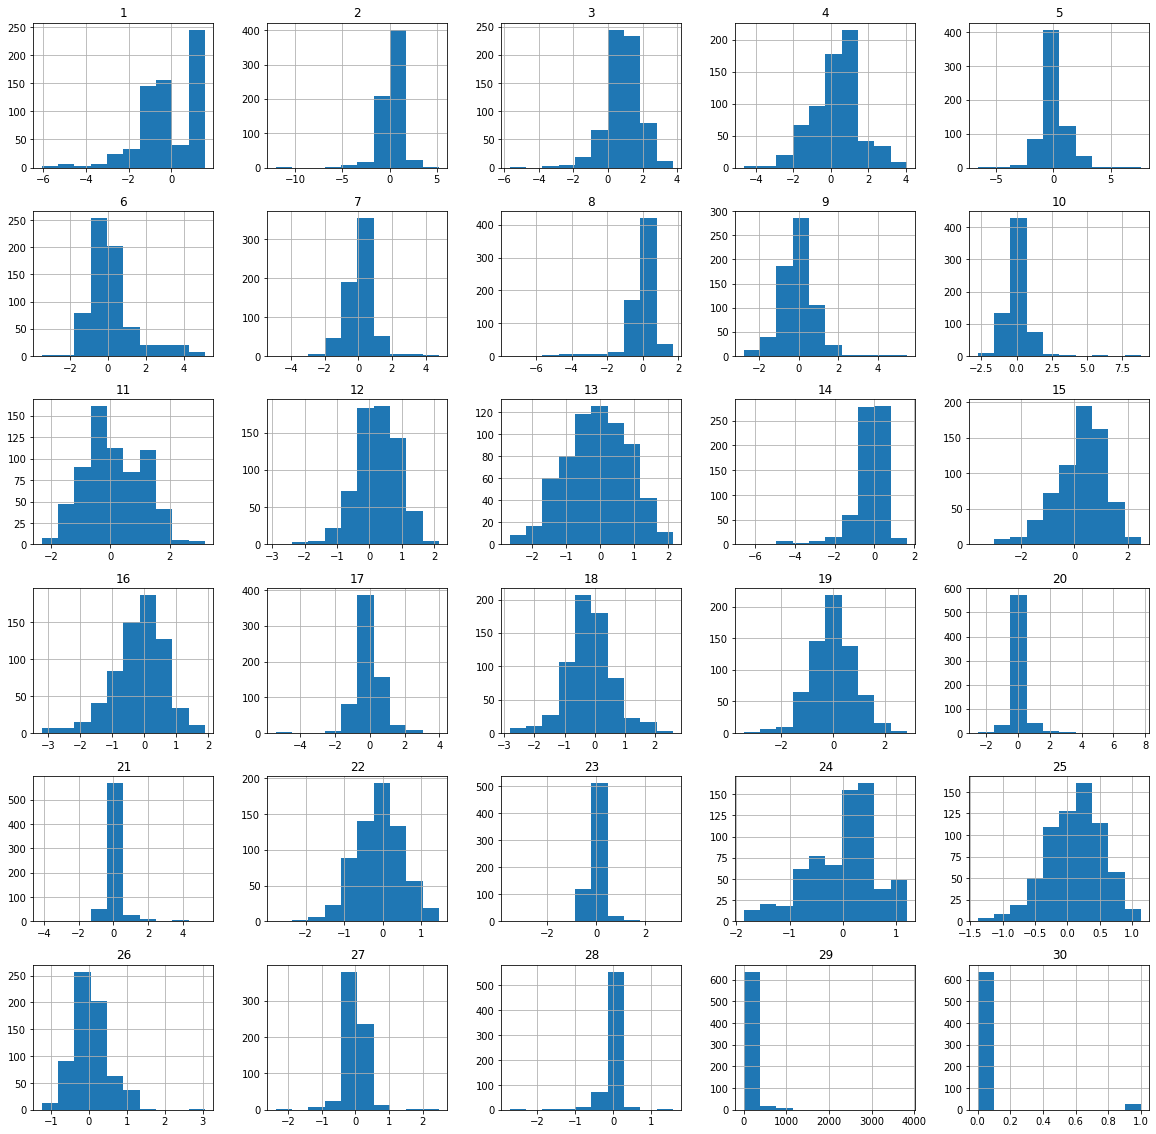

In [6]:
#Above data in numbers does not provide insight clearly.  Let's plot the data in graph to understand
ds_ccfraud.hist(figsize=(20,20))
plt.show()



Text(0, 0.5, 'Frequency')

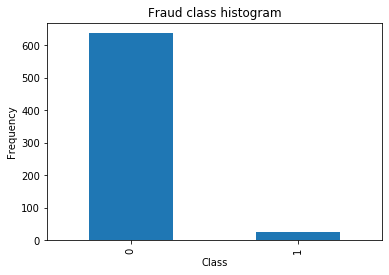

In [7]:
#Checking target values
count_classes = pd.value_counts(ds_ccfraud[30], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [8]:
x = ds_ccfraud.iloc[:,0:29]
y = ds_ccfraud.iloc[:,29]

In [9]:
#Above data is imbalanced as we have very less fraud transactions when compared to non-fraud transactions.
# in the above type of data, boosting methods are more robust

#Split the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)


In [10]:
#Model performance of RF, GBC & XGBC

rfc = RandomForestClassifier(n_estimators=1500, random_state=12)
rfc_model = rfc.fit(x_train, y_train)
print('Random Forest Train score: ',rfc_model.score(x_train, y_train))

gbc = GradientBoostingClassifier(
                    learning_rate=0.005,
                    n_estimators=1500,              
                    max_depth=9,                    
                    min_samples_split=1200,
                    min_samples_leaf=60,
                    subsample=0.85,
                    random_state=10,
                    max_features=7,
                    warm_start=True)
gbc_model = gbc.fit(x_train,y_train)
print('GBC Train score: ',gbc_model.score(x_train, y_train))

xgb = XGBClassifier(
                    learning_rate=0.1,
                    n_estimators=10,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)
xgb_model = xgb.fit(x_train, y_train)
print('XGBC Train score: ',xgb_model.score(x_train, y_train))


Random Forest Train score:  1.0
GBC Train score:  0.960377358490566
XGBC Train score:  0.9622641509433962


In [11]:
#Based on above data, Random Forest is giving 100% accuracy and it is completely over-fitted.  Ignoring this model.
#Among other 2 models, would like to XGBC model to predict.
#Writing to pickle file first and then reload it to predict on test data
filename = 'Finalized_XGBoostClassifier_model.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
pickled_model = pickle.load(open("Finalized_XGBoostClassifier_model.pkl", 'rb'))
y_pred=pickled_model.predict(x_test)
print('Accuracy of XGBC model: ', accuracy_score(y_test, y_pred))

Accuracy of XGBC model:  0.9624060150375939
